In [4]:
from sklearn.datasets import load_diabetes

data = load_diabetes()

In [5]:
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [6]:
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [7]:
data.target[:10]

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310.])

In [8]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [9]:
data['data'].shape

(442, 10)

In [10]:
data['target'].shape

(442,)

In [11]:
X = data['data']
y = data['target']

In [12]:
import pandas as pd

In [13]:
df = pd.DataFrame(X, columns = data.feature_names)

In [14]:
df['target'] = y

In [15]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [16]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

StandardScaler()

In [19]:
X_train_std  = scaler.transform(X_train)
X_test_std   = scaler.transform(X_test)

## train the model

In [20]:
from sklearn.neural_network import MLPRegressor

- `hidden_layer_sizes` tuple, length = n_layers - 2, default=(100,)
    - The ith element represents the number of neurons in the ith hidden layer.
    - [64, 32, 16, 8]
        - 4 hidden layers
            - 1st layer with 64 neurons
            - 2nd layer with 32 neurons
            - 3rd layer with 16 nodes
            - 4th layer with  8 nodes
- `activation` 
    - {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
        - we will use 'logistic`
            - synonymous with `sigmoid`
- `solver` {‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
    - choice of gradient descent
    - simple GD will be `sgd`
- `batch_size` int, default=’auto’
    - typical values 
        - 256, 200, 128, 64, 32
- `learning_rate`
    - {‘constant’, ‘invscaling’, ‘adaptive’}, default=’constant’
- `learning_rate_init` double, default=0.001
    - The initial learning rate used. It controls the step-size in updating the weights. Only used when solver=’sgd’ or ‘adam’.
- `max_iter` int, default=200
    - Maximum number of iterations. 
    - The `solver iterates until convergence` (determined by ‘tol’) or this `number of iterations`. 
    - For stochastic solvers (‘sgd’, ‘adam’), note that this determines the number of epochs (how many times each data point will be used), not the number of gradient steps.
- `shuffle` bool, default=True
    - Whether to shuffle samples in each iteration. 
    - Only used when solver=’sgd’ or ‘adam’.
- `tol` float, default=1e-4
    - threshold
    - Tolerance for the optimization. 
    - When the loss or score is not improving by at least `tol` for `n_iter_no_change` consecutive iterations, unless learning_rate is set to ‘adaptive’, convergence is considered to be reached and training stops.
- `verbose` bool, default=False
    - Whether to print progress messages to stdout.
- `early_stopping` - bool, default=False
    - Whether to use early stopping to terminate training when validation score is not improving. 
    - If set to true, it will automatically set aside 10% of training data as validation and terminate training when `validation score is not improving` by at least `tol` for `n_iter_no_change` consecutive epochs. 
    - The split is stratified, except in a multilabel setting. Only effective when solver=’sgd’ or ‘adam’
- `validation_fraction` float, default=0.1
    - The proportion of training data to set aside as validation set for early stopping. Must be between 0 and 1. 
    - Only used if early_stopping is True
    - typical good values 
        - 20%, 25%, 30%
- `n_iter_no_change` int, default=10
    - Maximum number of epochs/iterations to not meet `tol` improvement. 
    - Only effective when solver=’sgd’ or ‘adam’
    - typical values 
        - 10, 15, 20
- `random_state` int, RandomState instance, default=None
    - Determines random number generation for `weights` and `bias` initialization, `train-test split` if early stopping is used, and batch sampling when solver=’sgd’ or ‘adam’. 
    - Pass an `int` for reproducible results across multiple function calls.

##### Config 1

In [21]:
# mlp = MLPRegressor(hidden_layer_sizes=(64),            # with 1 l
#                     activation='logistic',             # same as sigmoid
#                     solver='sgd',
#                     batch_size=32,
#                     learning_rate='constant',
#                     learning_rate_init=.001,           # .01, .05, .005, .001
#                     max_iter=1500,
#                     shuffle=True,
#                     tol=.0001,                         # .0001, .001, .01, .05
#                     verbose=False,
#                     early_stopping=True,               # Always use this, set to True
#                     validation_fraction=.20,           # 20% is fine
#                     n_iter_no_change=10,               # 5, 10, 20, 50, less than the max_iter   
#                     random_state=100
#                    )

##### Config 2

In [22]:
# mlp = MLPRegressor(hidden_layer_sizes=(64),           # with 1 l
#                     activation='logistic',             # same as sigmoid
#                     solver='sgd',
#                     batch_size=32,
#                     learning_rate='constant',
#                     learning_rate_init=.001,           # .01, .05, .005, .001
#                     max_iter=1500,
#                     shuffle=True,
#                     tol=.0001,                         # .0001, .001, .01, .05
#                     verbose=False,
#                     early_stopping=True,               # Always use this, set to True
#                     validation_fraction=.20,           # 20% is fine
#                     n_iter_no_change=10,               # 5, 10, 20, 50, less than the max_iter   
#                     random_state=100
#                    )

##### Config 3
- play with more than 1 layer (32, 16, 8)
- with activation set to 'sigmoid' 
    - this will degrade the performance
        - sigmoid is not a good choice for hidden layer

In [23]:
# mlp = MLPRegressor(hidden_layer_sizes=(32, 16, 8),    # with 2 l
#                     activation='logistic',             # same as sigmoid
#                     solver='sgd',
#                     batch_size=32,
#                     learning_rate='constant',
#                     learning_rate_init=.001,           # .01, .05, .005, .001
#                     max_iter=1500,
#                     shuffle=True,
#                     tol=.0001,                         # .0001, .001, .01, .05
#                     verbose=False,
#                     early_stopping=True,               # Always use this, set to True
#                     validation_fraction=.20,           # 20% is fine
#                     n_iter_no_change=10,               # 5, 10, 20, 50, less than the max_iter   
#                     random_state=100
#                    )

##### Config 4
- play with more than 1 layer (32, 16, 8)
- with activation set to 'relu' 
    - this will improve the performance


In [24]:
# mlp = MLPRegressor(hidden_layer_sizes=(32, 16, 8),    # with 2 l
#                     activation='relu',                 # same as sigmoid
#                     solver='sgd',
#                     batch_size=32,
#                     learning_rate='constant',
#                     learning_rate_init=.001,           # .01, .05, .005, .001
#                     max_iter=1500,
#                     shuffle=True,
#                     tol=.0001,                         # .0001, .001, .01, .05
#                     verbose=False,
#                     early_stopping=True,               # Always use this, set to True
#                     validation_fraction=.20,           # 20% is fine
#                     n_iter_no_change=10,               # 5, 10, 20, 50, less than the max_iter   
#                     random_state=100
#                    )

##### Config 5
- 1 layer (32) --- try with 32/16/8/4/3
- with activation set to 'relu' 
    - this will improve the performance


In [25]:
mlp = MLPRegressor(hidden_layer_sizes=(24),           # with 1 l
                    activation='relu',                # same as sigmoid
                    solver='sgd',
                    batch_size=32,
                    learning_rate='constant',
                    learning_rate_init=.001,           # .01, .05, .005, .001
                    max_iter=1500,
                    shuffle=True,
                    tol=.0001,                         # .0001, .001, .01, .05
                    verbose=False,
                    early_stopping=True,               # Always use this, set to True
                    validation_fraction=.20,           # 20% is fine
                    n_iter_no_change=50,               # 5, 10, 20, 50, less than the max_iter   
                    random_state=100
                   )

In [26]:
mlp.fit(X_train_std, y_train)

MLPRegressor(batch_size=32, early_stopping=True, hidden_layer_sizes=24,
             max_iter=1500, n_iter_no_change=50, random_state=100, solver='sgd',
             validation_fraction=0.2)

#### Predictions and Evaluation
 
Now that we have a model it is time to use it to get predictions! We can do this simply with the predict() method off of our fitted model:

In [27]:
import numpy as np

In [28]:
y_pred = mlp.predict(X_test_std)

In [29]:
from sklearn import metrics

In [30]:
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE                    : ', np.mean(np.abs((y_test - y_pred) / y_test)) * 100)
print('MPE                     : ', np.mean((y_test - y_pred) / y_test) * 100)
print('r2 value                : ', metrics.r2_score(y_test, y_pred))

Mean Abs Error   MAE    :  40.27086083115045
Mean Sq  Error MSE      :  2553.124121127625
Root Mean Sq Error RMSE :  50.52844863171266
MAPE                    :  36.53571096200564
MPE                     :  -20.592105569040996
r2 value                :  0.6017756060091424


In [31]:
#mlp.loss_curve_

In [32]:
import matplotlib.pyplot as plt

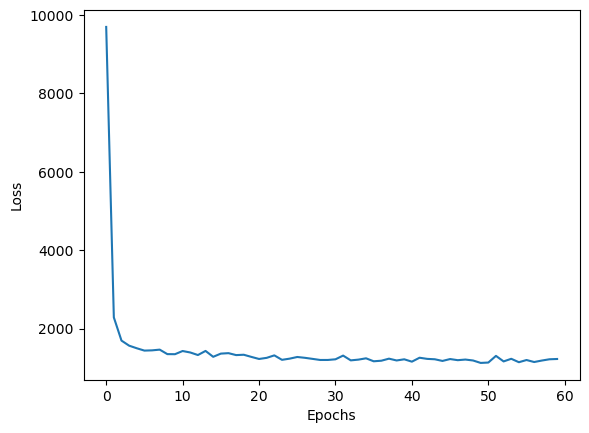

In [33]:
plt.plot(range(len(mlp.loss_curve_)), mlp.loss_curve_)
plt.ylabel('Loss')
plt.xlabel('Epochs');

extract the MLP __weights__ and __biases__ after training your model, we use its public attributes __coefs___ and __intercepts___.

coefs_ is a list of weight matrices, where weight matrix at index i represents the weights between layer i and layer i+1.

intercepts_ is a list of bias vectors, where the vector at index i represents the bias values added to layer i+1.

In [34]:
#mlp.hidden_layer_sizes

In [35]:
#len(mlp.coefs_)

In [36]:
#len(mlp.coefs_[0])

In [37]:
# check the size of weights matrix (between the input and the hidden layer)
#mlp.coefs_[0].shape

In [38]:
# check the sizepf weights matrix (between the hidden layer and the output)
#mlp.coefs_[1].shape

In [39]:
#mlp.batch_size

In [40]:
#mlp.classes_

In [41]:
#len(mlp.intercepts_)

In [42]:
#mlp.intercepts_

In [43]:
# this should match the number of neurons in the hidden layer
#len(mlp.intercepts_[0])

In [44]:
# this should match the number of neurons in the output layer
#len(mlp.intercepts_[1])

#### Let us try linear regression - sklearn

In [45]:
# import the ML algorithm
from sklearn.linear_model import LinearRegression


In [46]:
import seaborn as sns

In [47]:
df.dtypes

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

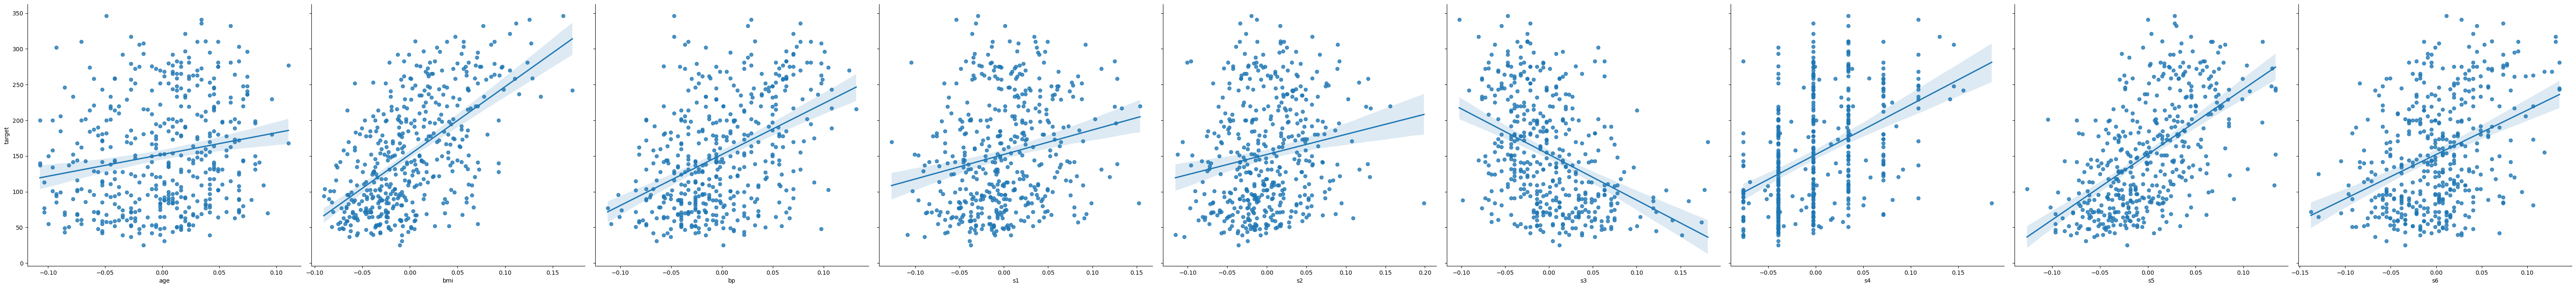

In [48]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(df, 
             x_vars=['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], 
             y_vars='target', 
             height=7, 
             aspect=1, 
             kind='reg');

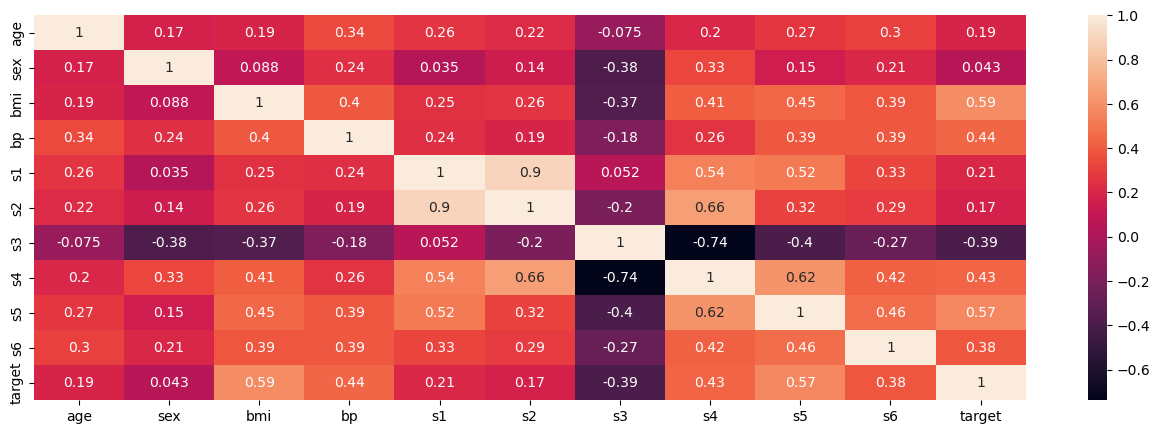

In [49]:
plt.figure(figsize=(16, 5))
sns.heatmap( df.corr(), annot=True );

In [50]:
df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')

In [51]:
# create a Python list of feature names
feature_cols = ['bmi', 'bp', 's3', 's4', 's5', 's6']

# use the list to select a subset of the original DataFrame
X = df[feature_cols]

# select a Series from the DataFrame
y = df['target']

In [52]:
# Splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

In [53]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(309, 6)
(309,)
(133, 6)
(133,)


In [54]:
# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# fit the model to the training data (learn the coefficients)
#linreg_sm = smdl.OLS(y_train, X_train).fit()

LinearRegression()

In [55]:
# Making predictions
# make predictions on the testing set
y_pred = linreg.predict(X_test)

# predict using sm
#y_pred_sm = linreg.predict(X_test)

In [56]:
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE                    : ', np.mean(np.abs((y_test - y_pred) / y_test)) * 100)
print('MPE                     : ', np.mean((y_test - y_pred) / y_test) * 100)
print('r2 value                : ', metrics.r2_score(y_test, y_pred))

Mean Abs Error   MAE    :  43.50925700094378
Mean Sq  Error MSE      :  2981.44950318457
Root Mean Sq Error RMSE :  54.60265106370358
MAPE                    :  35.551335629609795
MPE                     :  -12.358287841104211
r2 value                :  0.40779267069726854
